In [1]:
import sys
sys.path.insert(0, '../')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from yuntu import Audio

In [3]:
SAMPLE_AUDIO = '/Users/erobredo/Downloads/11k16bitpcm.wav'
audio = Audio(path=SAMPLE_AUDIO)

In [4]:
grid = audio.grid(frame_length=0.5, hop_length=0.3)

In [5]:
grid.read(start=4, end=10)

array([[ 3.0517578e-05, -1.2207031e-04, -1.8310547e-04, ...,
        -5.1086426e-02,  2.1789551e-02, -5.9143066e-02],
       [ 2.2033691e-02, -1.4382935e-01, -4.5104980e-02, ...,
        -2.6245117e-03, -1.3265991e-01, -6.2988281e-02],
       [-2.9016113e-01, -2.4047852e-01, -2.4636841e-01, ...,
         5.1574707e-03,  2.3498535e-03,  5.7983398e-04],
       ...,
       [ 1.0128784e-01,  2.1109009e-01,  2.2647095e-01, ...,
         8.2244873e-02,  1.0891724e-01,  1.9195557e-02],
       [-2.0651245e-01, -1.7816162e-01, -1.9488525e-01, ...,
         2.1667480e-03, -7.9345703e-03,  9.1552734e-05],
       [-3.1463623e-02, -1.4892578e-02, -4.6997070e-03, ...,
        -4.5471191e-03, -4.5166016e-03,  2.9602051e-03]], dtype=float32)

In [6]:
spectrum = audio.features.spectrum()

In [7]:
spectrum.window

FrequencyWindow(min=0, max=5512.5)

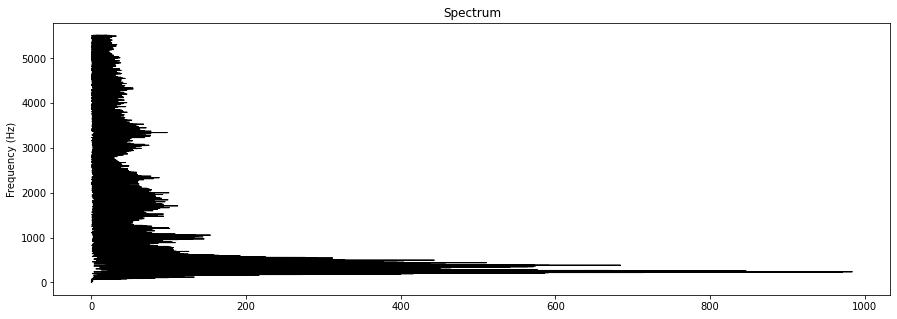

In [8]:
spectrum.plot(ylabel=True, title=True, figsize=(15, 5));

In [9]:
spectrum_cut = spectrum.cut(min_freq=1000, max_freq=2000)

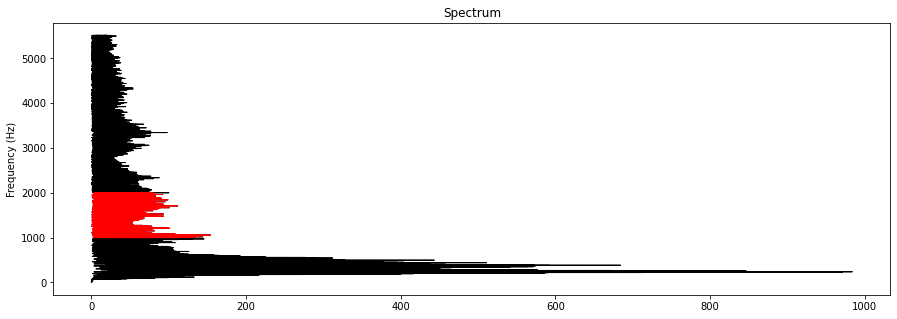

In [10]:
ax = spectrum.plot(ylabel=True, title=True, figsize=(15, 5));
spectrum_cut.plot(ax=ax, color='red')

In [18]:
mega_cut = spectrum.cut(min_freq=4000, max_freq=10000, pad=True, constant_values=0)

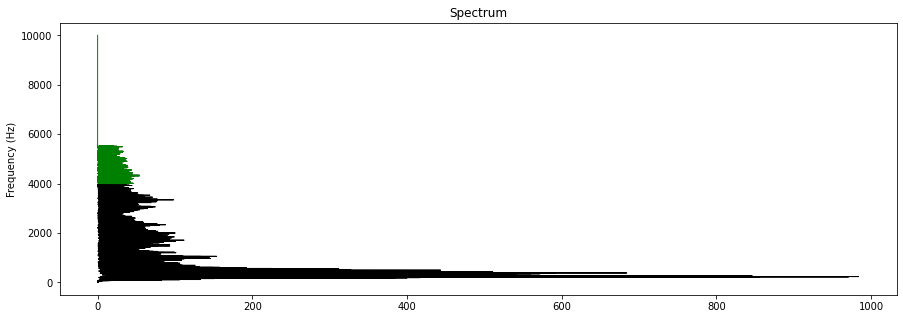

In [19]:
ax = spectrum.plot(ylabel=True, title=True, figsize=(15, 5));
mega_cut.plot(ax=ax, color='green')

In [11]:
spectrum.df

0.07240523287887146

In [12]:
spectrum.frequency_size

76134

In [13]:
spectrum.resolution

13.811156462585034

In [14]:
resampled_spectrum = spectrum.resample(resolution=1)
super_resampled_spectrum = spectrum.resample(resolution=0.2)

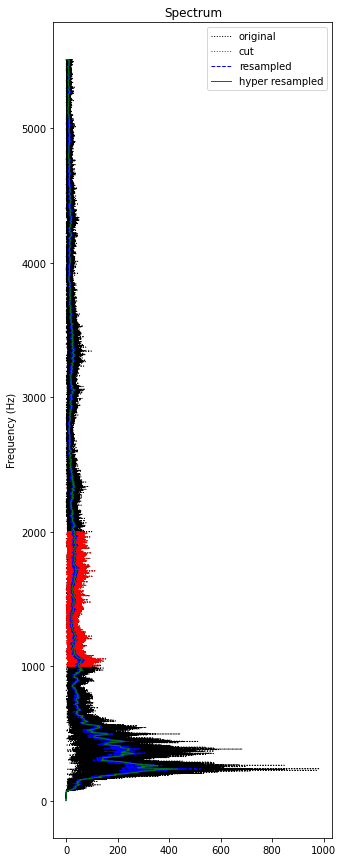

In [15]:
ax = spectrum.plot(ylabel=True, title=True, figsize=(5, 15), label='original', linestyle='dotted');
spectrum_cut.plot(ax=ax, color='red', label='cut', linestyle='dotted')
resampled_spectrum.plot(ax=ax, color='blue', label='resampled', linestyle='--')
super_resampled_spectrum.plot(ax=ax, color='green', label='hyper resampled')
plt.legend()

In [15]:
spectrum.get_aggr_value(freq=1000, buffer=1)

48.54746612271785

In [16]:
import yuntu.core.geometry.base as geom


poly = geom.Polygon(
    shell=[(0,0), (1, 2000), (2, 3000), (1, 1000), (0, 0)]
)

spectrum.get_aggr_value(geometry=poly)

48.95825072537069

In [17]:
mask = spectrum.to_mask(poly)

In [18]:
from scipy import signal

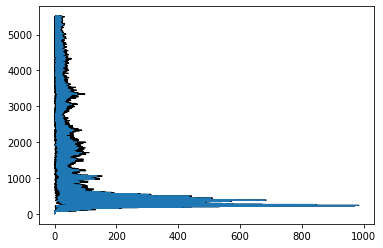

In [19]:
ax = spectrum.plot()
ax.plot(
    signal.wiener(spectrum),
    spectrum.frequencies,
    linewidth=1)

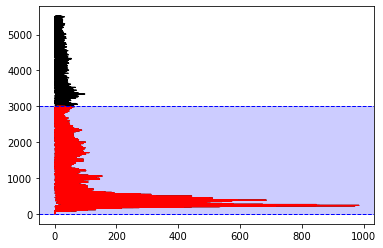

In [20]:
ax = spectrum.plot()
mask.plot(ax=ax, media=True, media_kwargs=dict(color='red'))

In [21]:
spec = audio.features.spectrogram()

In [22]:
spec.frequency_axis.start

0

In [23]:
spec.frequencies

array([   0.        ,   10.76660156,   21.53320312,   32.29980469,
         43.06640625,   53.83300781,   64.59960938,   75.36621094,
         86.1328125 ,   96.89941406,  107.66601562,  118.43261719,
        129.19921875,  139.96582031,  150.73242188,  161.49902344,
        172.265625  ,  183.03222656,  193.79882812,  204.56542969,
        215.33203125,  226.09863281,  236.86523438,  247.63183594,
        258.3984375 ,  269.16503906,  279.93164062,  290.69824219,
        301.46484375,  312.23144531,  322.99804688,  333.76464844,
        344.53125   ,  355.29785156,  366.06445312,  376.83105469,
        387.59765625,  398.36425781,  409.13085938,  419.89746094,
        430.6640625 ,  441.43066406,  452.19726562,  462.96386719,
        473.73046875,  484.49707031,  495.26367188,  506.03027344,
        516.796875  ,  527.56347656,  538.33007812,  549.09667969,
        559.86328125,  570.62988281,  581.39648438,  592.16308594,
        602.9296875 ,  613.69628906,  624.46289062,  635.22949

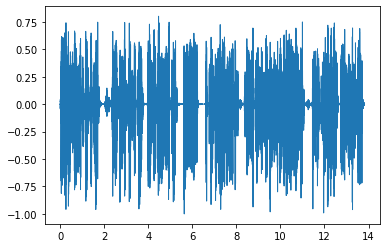

In [24]:
audio.plot()

In [25]:
audio_cut = audio.cut(end_time=6)

In [26]:
audio_cut.window

TimeWindow(start=0, end=6)

In [27]:
spec = audio.cut(end_time=6).features.db_spectrogram()

In [28]:
spec_cut = spec.cut(min_freq=100, max_freq=1000)

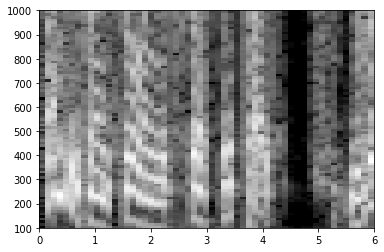

In [29]:
spec_cut.plot()